In [23]:
import uproot
import awkward as ak
import vector
vector.register_awkward()
import matplotlib.pyplot as plt

In [2]:
filename = "output_247.root"
with uproot.open(filename) as f:
    weights = f['Event']['Event.Weight'].arrays()
    tree = f['Particle']
    events = tree.arrays(library="ak", how="zip")

KeyInFileError: not found: 'Event' (with any cycle number)

    Available keys: 'Events;1', 'tag;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1', 'LuminosityBlocks;1'

in file output_247.root

In [10]:
file = uproot.open(filename)
print(file.keys())
print(file['Events;1'])
events = file['Events;1'].arrays(library="ak", how="zip")

['tag;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1', 'Events;1']
<TTree 'Events' (1416 branches) at 0x7f3860a38160>


In [28]:
muons = ak.Array(events.Muon, with_name="Momentum4D")
dimu = muons[ak.num(muons) == 2]
dimu = dimu[dimu.charge[:,0] == -dimu.charge[:,1]]
dimu = dimu[:,0] + dimu[:,1]
print(dimu.mass)
mass_mu = dimu.mass

[11.8, 17.3, 3.11, 14.1, 14.8, 10.3, ..., 18.2, 4.27, 1.26, 17, 15.7, 19.2]


In [29]:
elecs = ak.Array(events.Electron, with_name="Momentum4D")
dielec = elecs[ak.num(elecs) == 2]
dielec = dielec[dielec.charge[:,0] == -dielec.charge[:,1]]
dielec = dielec[:,0] + dielec[:,1]
print(dielec.mass)
mass_el = dielec.mass

[37.9, 25.2, 0.0552, 47.4, 1.61, 11.2, ..., 7.34, 1.14, 39.9, 0.597, 13, 44.5]


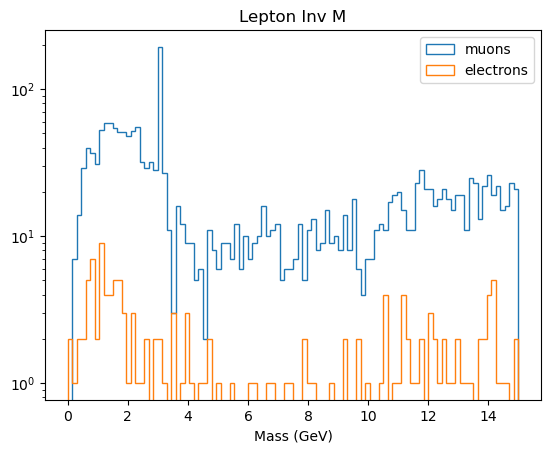

In [35]:
_ = plt.hist(mass_mu, histtype="step", bins=100, range=(0,15), label='muons')
_ = plt.hist(mass_el, histtype="step", bins=100, range=(0,15), label='electrons')
plt.title("Lepton Inv M")
plt.xlabel("Mass (GeV)")
plt.yscale('log')
plt.legend()

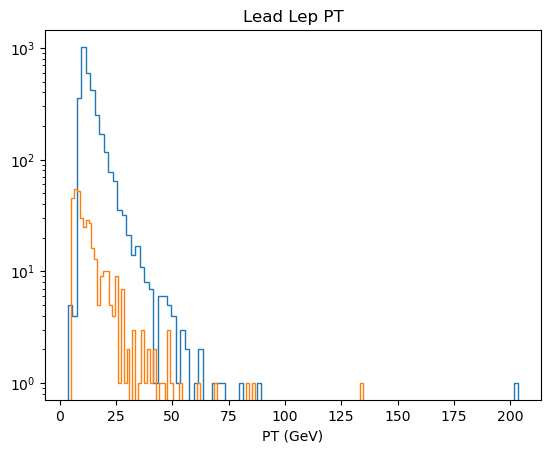

In [34]:
muons = ak.Array(events.Muon, with_name="Momentum4D")
dimu = muons[ak.num(muons) == 2]
dimu = dimu[dimu.charge[:,0] == -dimu.charge[:,1]]
lead_pt_mu = dimu[:,0].pt

elecs = ak.Array(events.Electron, with_name="Momentum4D")
dielec = elecs[ak.num(elecs) == 2]
dielec = dielec[dielec.charge[:,0] == -dielec.charge[:,1]]
lead_pt_elec = dielec[:,0].pt

_ = plt.hist(lead_pt_mu, histtype='step', bins=100, label='mu')
_ = plt.hist(lead_pt_elec, histtype='step', bins=100, label='elec')
plt.title("Lead Lep PT")
plt.xlabel('PT (GeV)')
plt.yscale('log')

In [11]:
import numpy as np 
MH = 60
MAs = list(np.arange(60, 160, 5))
MHchs = list(np.arange(60, 500, 5))
def getLam345Limit(MH):
    lam345_low = 0.03985 - 6.786*(10**(-4))*MH - 4.828 * (10**(-7))*(MH**2)
    lam345_high = - lam345_low
    return lam345_low, lam345_high

masses = []
for MA in MAs:
    for MHch in MHchs:
        if MA - MH > 90:
            continue 
        if MHch < MA:
            continue
        if MHch - MA > 100:
            continue
        #print(f"mH = {MH}, mA = {MA}, mHch = {MHch}")
        masses.append([MH, MA, MHch])

masses = np.array(masses)
print(f"The number of points in the param space chosen = {len(masses)}")
# for H in MH:
#     for A in MA:
#         for Hch in MHch:
#             if ((H < A) & (A < Hch) & (H > 125)):
#                 if ((A > 200) & (abs(A - Hch) > 20)):
#                     continue

#                 lam345_low, lam345_high = getLam345Limit(H)
#                 print(f"mH = {H}, mA = {A}, mHch = {Hch}, lam345_low = {lam345_low}")

The number of points in the param space chosen = 399


Text(0.5, 0, 'mHch')

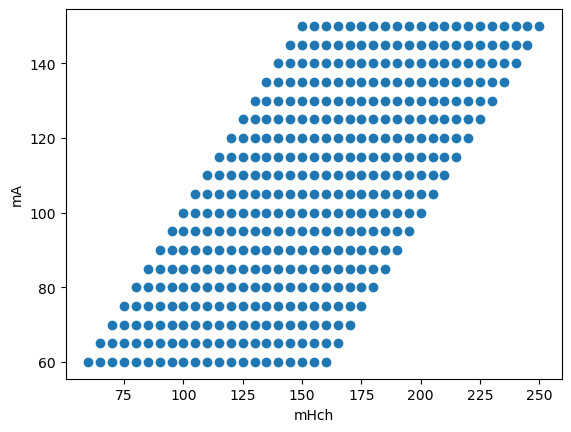

In [12]:
import matplotlib.pyplot as plt
massH = masses[:,0]
massA = masses[:,1]
massHch = masses[:,2]
plt.scatter(massHch, massA)
plt.ylabel("mA")
plt.xlabel("mHch")

Text(0.5, 0, 'mHch - mH')

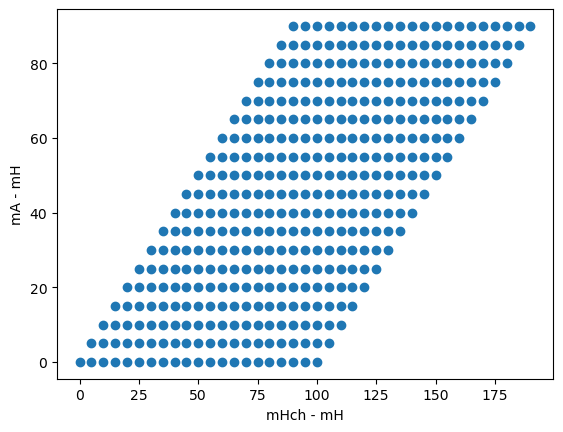

In [13]:
mA_mH = massA - massH
mHch_mH = massHch - massH
plt.scatter(mHch_mH, mA_mH)
plt.ylabel("mA - mH")
plt.xlabel("mHch - mH")

Text(0.5, 0, 'mHch')

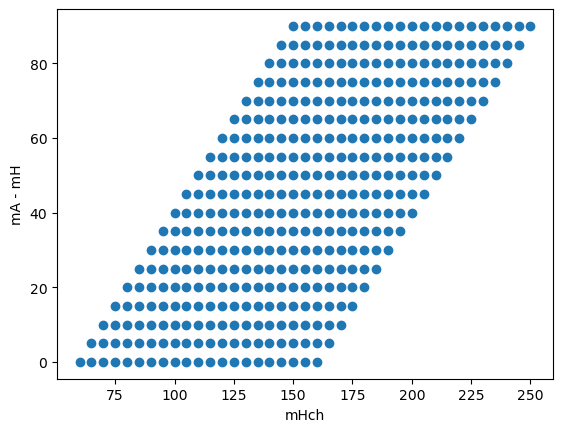

In [14]:
mA_mH = massA - massH
mHch_mH = massHch - massH
plt.scatter(massHch, mA_mH)
plt.ylabel("mA - mH")
plt.xlabel("mHch")